In [1]:
import os
import sys
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

In [2]:
data = xr.open_dataset('cm1out_pdata_shear.nc')
data

<xarray.Dataset>
Dimensions:  (lat: 1, lev: 1, lon: 29160, time: 169)
Coordinates:
  * time     (time) datetime64[ns] 2001-07-03 2001-07-03T01:00:00 ... 2001-07-10
  * lon      (lon) float64 1.0 2.0 3.0 4.0 ... 2.916e+04 2.916e+04 2.916e+04
  * lat      (lat) float64 1.0
  * lev      (lev) float64 1.0
Data variables:
    x        (time, lev, lat, lon) float32 ...
    y        (time, lev, lat, lon) float32 ...
    z        (time, lev, lat, lon) float32 ...
    u        (time, lev, lat, lon) float32 ...
    v        (time, lev, lat, lon) float32 ...
    w        (time, lev, lat, lon) float32 ...
    th       (time, lev, lat, lon) float32 ...
    t        (time, lev, lat, lon) float32 ...
    prs      (time, lev, lat, lon) float32 ...
    qv       (time, lev, lat, lon) float32 ...
    qc       (time, lev, lat, lon) float32 ...
    qr       (time, lev, lat, lon) float32 ...
    qi       (time, lev, lat, lon) float32 ...
    qs       (time, lev, lat, lon) float32 ...
    qg       (time, lev

In [3]:
data2 = xr.open_dataset('cm1out_s_CMT_Ugas.nc')
data2

/home/willytsai/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:465: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/willytsai/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


<xarray.Dataset>
Dimensions:  (lat: 216, lev: 65, lon: 216, time: 360)
Coordinates:
  * time     (time) object 0001-07-03 00:00:00 ... 0360-07-03 00:00:00
  * lon      (lon) float64 1.0 3.0 5.0 7.0 9.0 ... 423.0 425.0 427.0 429.0 431.0
  * lat      (lat) float64 1.0 3.0 5.0 7.0 9.0 ... 423.0 425.0 427.0 429.0 431.0
  * lev      (lev) float64 0.025 0.08684 0.1724 0.2816 ... 26.75 27.25 27.75
Data variables:
    rain     (time, lat, lon) float32 ...
    prate    (time, lat, lon) float32 ...
    sws      (time, lat, lon) float32 ...
    svs      (time, lat, lon) float32 ...
    sps      (time, lat, lon) float32 ...
    srs      (time, lat, lon) float32 ...
    sgs      (time, lat, lon) float32 ...
    sus      (time, lat, lon) float32 ...
    shs      (time, lat, lon) float32 ...
    thflux   (time, lat, lon) float32 ...
    qvflux   (time, lat, lon) float32 ...
    tsk      (time, lat, lon) float32 ...
    cd       (time, lat, lon) float32 ...
    ch       (time, lat, lon) float32 ...
  

In [29]:
y_dim = data2.lat
z_dim = data2.lev

In [4]:
x = data.x.values.swapaxes(1,3).squeeze() # x location
y = data.y.values.swapaxes(1,3).squeeze() # y location
z = data.z.values.swapaxes(1,3).squeeze() # z location

qv = data.qv.values.swapaxes(1,3).squeeze()
b = data.b.values.swapaxes(1,3).squeeze() # buoyancy
u_con = np.tile(data.u.values.swapaxes(1,3).squeeze()[0,:],(169,1))

In [5]:
x.shape

(169, 29160)

In [6]:
np.linspace(0,29160,55,dtype=int)

array([    0,   540,  1080,  1620,  2160,  2700,  3240,  3780,  4320,
        4860,  5400,  5940,  6480,  7020,  7560,  8100,  8640,  9180,
        9720, 10260, 10800, 11340, 11880, 12420, 12960, 13500, 14040,
       14580, 15120, 15660, 16200, 16740, 17280, 17820, 18360, 18900,
       19440, 19980, 20520, 21060, 21600, 22140, 22680, 23220, 23760,
       24300, 24840, 25380, 25920, 26460, 27000, 27540, 28080, 28620,
       29160])

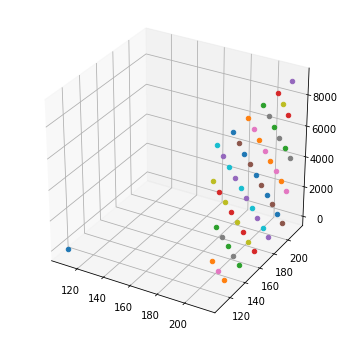

In [7]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
for npar in np.linspace(0,29159,55,dtype=int):
    zdata = z[0,npar]
    xdata = x[0,npar]/1000 # km
    ydata = y[0,npar]/1000 # km
    #ax.plot3D(xdata, ydata, zdata, 'gray')
    # Data for three-dimensional scattered points
    ax.scatter3D(xdata, ydata, zdata, cmap='Greens');

(0, 432)

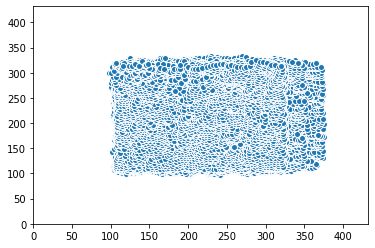

In [8]:
tt = 121
plt.scatter(x[tt,:]/1000,y[tt,:]/1000,edgecolor='w')
plt.xlim([0,432])
plt.ylim([0,432])

(0, 432)

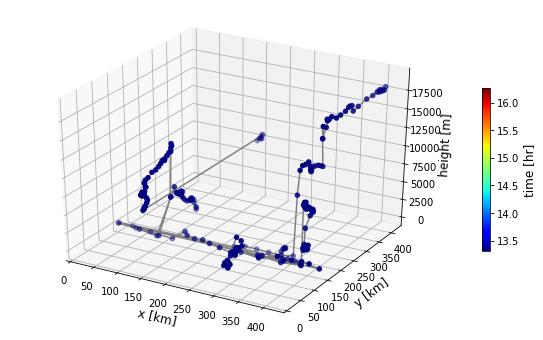

In [9]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')

for npar in range(510,515):
    zdata = z[121:,npar]
    xdata = x[121:,npar]/1000 # km
    ydata = y[121:,npar]/1000 # km
    udata = u_con[121,npar]
    ax.plot3D(xdata, ydata, zdata, 'gray')

    # Data for three-dimensional scattered points
    cf = ax.scatter3D(xdata, ydata, zdata, c=udata*np.ones(len(zdata)), cmap='jet');
cbar = plt.colorbar(cf,ax=ax,shrink=0.5)
    
cbar.set_label('time [hr]',fontsize=12)
ax.set_xlabel('x [km]',fontsize=12)
ax.set_ylabel('y [km]',fontsize=12)
ax.set_zlabel('height [m]',fontsize=12)
ax.set_xlim([0,432])
ax.set_ylim([0,432])

In [ ]:
# %%time
# # averaged field based on parcels
# y_pos_bin = np.linspace(0,432,217)
# z_pos_bin = np.linspace(0,18000,201)

# u_mean_parcel = np.zeros((120,len(y_pos_bin)-1,len(z_pos_bin)-1))
# num_parcel = np.copy(u_mean_parcel)

# n=0
# for t in range(121,121+120):
#     zdata = z[t,:] # z-pos for all parcels [m]
#     ydata = y[t,:]/1000 # y-pos for all parcels [km]
    
#     for k in range(len(z_pos_bin)-1):
#         for j in range(len(y_pos_bin)-1):
#             idz = np.where(np.logical_and(zdata>=z_pos_bin[k],zdata<z_pos_bin[k+1]))[0]
#             idy = np.where(np.logical_and(ydata>=y_pos_bin[j],ydata<y_pos_bin[j+1]))[0]
#             id_com = np.intersect1d(idz,idy)
            
#             u_mean_parcel[n,j,k] = np.nanmean(u_con[t,id_com])
#             num_parcel[n,j,k] = len(id_com)
#     n+=1

In [ ]:
# for tt in [0,10,20,30,40]:

#     fig, ax = plt.subplots(1,2,figsize=(15,6))

#     cf1 = ax[0].contourf(y_pos_bin[:-1],z_pos_bin[:-1],u_mean_parcel[tt,:,:].T)
#     cbar1 = plt.colorbar(cf1,ax=ax[0],shrink=0.7);cbar1.set_label('U$_{mean}$ [m/s]',fontsize=12)

#     cf2 = ax[1].contourf(y_pos_bin[:-1],z_pos_bin[:-1],num_parcel[tt,:,:].T,cmap='binary')
#     cbar2 = plt.colorbar(cf2,ax=ax[1],shrink=0.7);cbar2.set_label('parcels',fontsize=12)

#     ax[0].set_ylabel('Z [m]',fontsize=12)
#     ax[1].set_ylabel('Z [m]',fontsize=12)
#     ax[0].set_xlabel('Y [km]',fontsize=12)
#     ax[1].set_xlabel('Y [km]',fontsize=12)

#     ax[0].set_title('Time = '+ str(tt/3) + ' [hr]')
    
#     fig.savefig('/w2-data2/willytsai/cm1r19.8/analysis/runs_cheyenne/parcel_Ucom_'+str(tt/3)+'hr.png',
#                 dpi=200,bbox_inches='tight',transparent=False)
#     plt.close()

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')

for npar in range(514,515):
    zdata = z[121:,npar]
    xdata = x[121:,npar]/1000 # km
    ydata = y[121:,npar]/1000 # km
    ax.plot3D(xdata, ydata, zdata, 'gray')

    # Data for three-dimensional scattered points
    cf = ax.scatter3D(xdata, ydata, zdata, c=np.arange(len(zdata)), cmap='jet');
cbar = plt.colorbar(cf,ax=ax,shrink=0.5)
    
cbar.set_label('time [hr]',fontsize=12)
ax.set_xlabel('x [km]',fontsize=12)
ax.set_ylabel('y [km]',fontsize=12)
ax.set_zlabel('height [m]',fontsize=12)
ax.set_xlim([0,432])
ax.set_ylim([0,432])

In [ ]:
plt.plot(b[121:,515])

### Parcel fluid carring U scalar

In [4]:
u_gas = data2.pt1

In [6]:
u_gas.shape

(360, 65, 216, 216)

Text(0, 0.5, 'Height [km]')

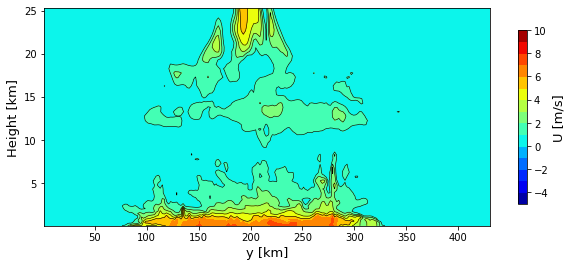

In [33]:
fig,ax = plt.subplots(1,1,figsize=(10,4))
cf = ax.contourf(y_dim,z_dim[:60],u_gas[30,:60,:,0],levels=np.linspace(-5,10,16),cmap='jet')
cbar = plt.colorbar(cf,ax=ax,shrink=0.8)
cbar.set_label('U [m/s]',fontsize=13)
cf2 = ax.contour(y_dim,z_dim[:60],u_gas[30,:60,:,0],levels=[-5,-4,-3,-2,-1,1,2,3,4,5],colors=['k'],linewidths=0.6)
ax.set_xlabel('y [km]',fontsize=13)
ax.set_ylabel('Height [km]',fontsize=13)

In [ ]:
# animations for U component evolution in the y-z plane

for t in range(0,len(t_dim),3):
    fig,ax = plt.subplots(1,1,figsize=(10,4))
    cf = ax.contourf(y_dim,z_dim[:60],u[t,:60,:,0],levels=np.linspace(-5,10,16),cmap='jet')
    cbar = plt.colorbar(cf,ax=ax,shrink=0.8)
    cbar.set_label('U [m/s]',fontsize=13)
    cf2 = ax.contour(y_dim,z_dim[:60],u[t,:60,:,0],levels=[-5,-4,-3,-2,-1,1,2,3,4,5]
                     ,colors=['k'],linewidths=0.6)
    ax.set_xlabel('y [km]',fontsize=13)
    ax.set_ylabel('Height [km]',fontsize=13)
    
    ax.set_title(exp_name+',  Time= '+ str(np.round(t/3,2)) + ' (h)',fontsize=14)

#     # save figs
    if (t < 10):
        plt.savefig(fig_dir+'/'+exp_name+'_000'+str(t)+'.png',dpi=300)
    elif (10 <= t) and (t < 100):
        plt.savefig(fig_dir+'/'+exp_name+'_00'+str(t)+'.png',dpi=300)
    elif (100 <= t) and (t < 1000):
        plt.savefig(fig_dir+'/'+exp_name+'_0'+str(t)+'.png',dpi=300)
    else:
        plt.savefig(fig_dir+'/'+exp_name+'_'+str(t)+'.png',dpi=300)
    plt.close(fig)
# end of loop
# save figures as gif
fp_in = fig_dir+'/*.png'
fp_out = fig_dir+'/'+exp_name+'.gif'

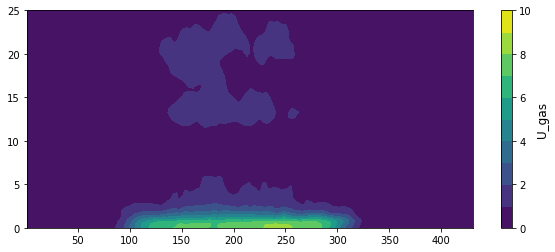

In [26]:
fig,ax = plt.subplots(1,1,figsize=(10,4))

cf = ax.contourf(data2.lat,data2.lev,u_gas[20,:,:,:].mean('lon'),levels=np.linspace(0,10,11))
ax.set_ylim([0,25])
cbar = plt.colorbar(cf,ax=ax)
cbar.set_label('U_gas',fontsize=12)

In [44]:
u_gas[3,:,:,:].mean('lon')[:,30]

<xarray.DataArray 'pt1' (lev: 65)>
array([ 1.31662978e-06,  1.26954274e-06,  1.24487860e-06,  1.22508800e-06,
        1.06522589e-06,  9.54048801e-07,  8.34020511e-07,  6.97753705e-07,
        5.45671355e-07,  3.77784431e-07,  1.93969228e-07,  3.04532186e-08,
        1.60288741e-10,  2.27823131e-13, -3.34867327e-14,  1.28485665e-14,
        3.54698058e-17, -3.46541052e-18,  6.02108542e-19,  7.53510294e-22,
       -1.08277369e-22,  3.03753810e-24,  2.89582201e-28,  1.88853673e-32,
        2.27391186e-34,  1.10980708e-37,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.0000

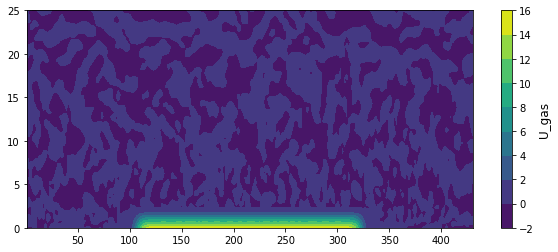

In [57]:
fig,ax = plt.subplots(1,1,figsize=(10,4))

cf = ax.contourf(data2.lat,data2.lev,data2.uinterp[100,:,:,:].mean('lon'))
ax.set_ylim([0,25])
cbar = plt.colorbar(cf,ax=ax)
cbar.set_label('U_gas',fontsize=12)

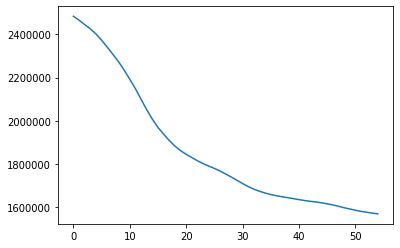

In [18]:
tmp = [np.sum(u_gas[t,:30,:,:].values.ravel()) for t in range(100)]
plt.plot(tmp)

In [19]:
np.sum(u_gas[0,:,:,:].values.ravel())

2484562.2